##Customer Churn Prediction for Telecom

## 1. Business Understanding:

Predicting and understanding customer churn is a critical aspect for Telecom. Customer churn not only affects the company's [profitability but also entails higher costs to acquire new customers. Maintaining customer loyalty enhances the bank's reputation and competitive position. Through predictive modeling, GNB Bank aims to preemptively address customer attrition, personalize services, and tailor marketing campaigns, fostering sustained customer loyalty.

Project overview
This project uses machine learning algorithms to build a model that can accurately predict customers who will churn based on the information available in the dataset. The dataset has 20 predictor variables mostly about customer usage patterns. There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners. The target variable is 'churn'. Since the target variable is a categorical variable, classification algorithms are used to build the predictive model. Recall is used to evaluate the model's performance.

Business understanding
Business problem
For telecommunication companies to grow their revenue generating base, it is key to attract new customers and at the same time increase customer retention rate. Customer churn is one of the most important concerns for large companies. Customer churn is a metric showing when a subscriber or a regular customer cancels his subscription or stops doing business with a company. Churn could be due to various factors, including switching to a competitor for better price offers, cancelling their subscription because of poor customer service, or discontinuing all contact with a brand due to insufficient touchpoints.
Syriatel is a provider of mobile telecommunication and data services based in Damascus, Syria. The company offers services including calls, news, message, GSM and internet services. It has successfully established its reputation by focusing on customer satisfaction and social responsibility. Syriatel has established that long-term relationships with customers are more effective than trying to attract new customers. To them, working to keep a client is cheaper than working to get a new client. Churn prediction has therefore become a very important part of the company's strategy. This project aims to develop a model which accurately predicts customers who are most likely to churn, and identify the features that are important for predicting customer churn. Syriatel can thus act to prevent the customer who is likely to churn from actually churning.

Objectives
To build a machine learning model that can accurately predict customers who will churn based on the information available in the dataset.
To identify the features that are important for predicting customer churn.
Success criteria
The most important metric that will be used to evaluate the performance of the classification algorithm is recall. Recall involves the rate at which the model correctly predicts customers who are going to churn. The end goal is to minimize false negatives. Failure to identify a customer who is about to churn is more costly to the business, than wrongly classifying a non-churning customer. A successful model should have a recall of at least 85%.
However, if the model predicts that all customers will churn, it would have a perfect recall. This would not be useful to the business since it is clear that not all customers will churn. It will be important to keep track of precision and accuracy as secondary metrics.

Load and understand the data

## 2. Data Understanding

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [ ]:
# load and preview the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning
#### Checking for missing values and duplicates

In [ ]:
df.isna().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
# check for duplicates using the phone number, since its a unique identifier
df.duplicated(subset='phone number').value_counts()

False    3333
Name: count, dtype: int64

The dataset contains no missing values. There are no duplicates in the phone number entiries

## EDA
### Univariate Analysis
"churn" is the target variable for this classification project.

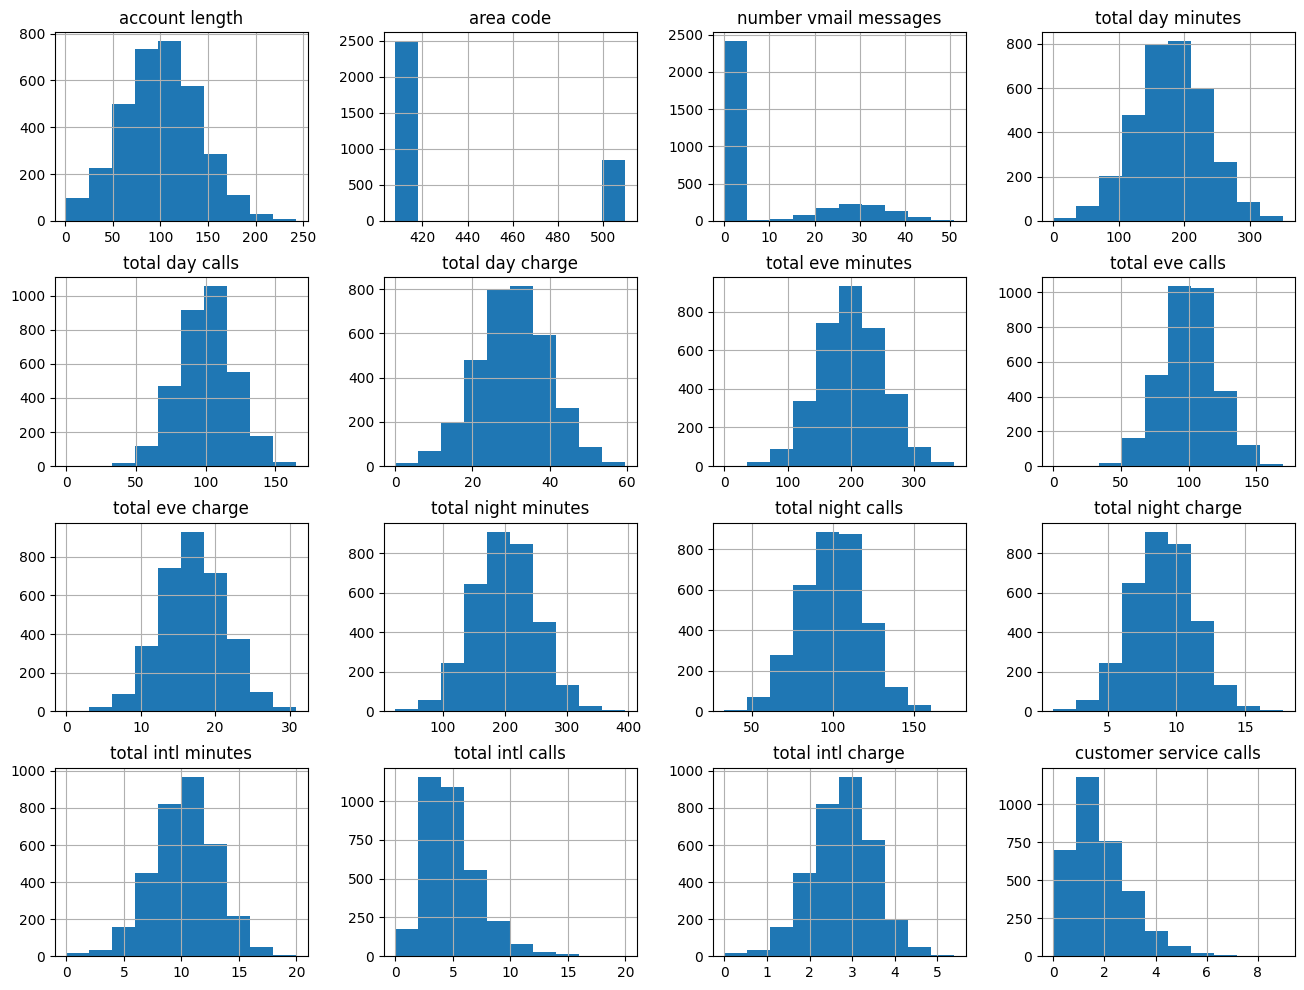

In [ ]:
df.drop(columns='churn').hist(figsize=(16,12));

The scaling differs across the features, and a few of the features are not normally distributed. The features will therefore have to be scaled and normalized.

## Bivariate Analysis

## Multivariate Analysis

## Modeling
### Random forest

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Identify feature columns and target column
X = df.drop(columns=['churn', 'phone number'])
y = df['churn']

# List of categorical and numerical columns
categorical_cols = ['state', 'international plan', 'voice mail plan']
numerical_cols = X.drop(columns=categorical_cols).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier(random_state=0)

# Create and evaluate the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_summary = classification_report(y_test, y_pred)

report_summary


'              precision    recall  f1-score   support\n\n       False       0.96      0.99      0.97       579\n        True       0.94      0.70      0.81        88\n\n    accuracy                           0.96       667\n   macro avg       0.95      0.85      0.89       667\nweighted avg       0.95      0.96      0.95       667\n'

Interpretation

  Accuracy: The model correctly predicts the churn status for 96% of the customers.
  Precision for True (Churn): When the model predicts a customer will churn, it is correct 94% of the time.
  Recall for True (Churn): The model correctly identifies 70% of all actual churn cases.
  F1-score for True (Churn): The harmonic mean of precision and recall is 0.81, indicating a good balance between precision and recall.

Recommendations

Additional Models: Consider evaluating other models (e.g., Gradient Boosting) to see if they perform better.



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=0)

# Create a pipeline for the Gradient Boosting model
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', gradient_boosting_model)])

# Train the model
pipeline_gb.fit(X_train, y_train)

# Evaluate the model
accuracy_gb, precision_gb, recall_gb, f1_gb = evaluate_model(pipeline_gb, X_test, y_test)
print(f"Gradient Boosting - Accuracy: {accuracy_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1 Score: {f1_gb}")


Gradient Boosting - Accuracy: 0.95952023988006, Precision: 0.8860759493670886, Recall: 0.7954545454545454, F1 Score: 0.8383233532934132


## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Define the XGBoost model
xgboost_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# Create a pipeline for the XGBoost model
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgboost_model)])

# Train the model
pipeline_xgb.fit(X_train, y_train)

# Evaluate the model
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(pipeline_xgb, X_test, y_test)
print(f"XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}")


XGBoost - Accuracy: 0.95952023988006, Precision: 0.8765432098765432, Recall: 0.8068181818181818, F1 Score: 0.8402366863905325


In [ ]:
# Dictionary to store model results
model_results = {
    'RandomForest': (accuracy_rf, precision_rf, recall_rf, f1_rf),
    'GradientBoosting': (accuracy_gb, precision_gb, recall_gb, f1_gb),
    'XGBoost': (accuracy_xgb, precision_xgb, recall_xgb, f1_xgb)
}

# Print model comparison
for model_name, metrics in model_results.items():
    print(f"{model_name} - Accuracy: {metrics[0]}, Precision: {metrics[1]}, Recall: {metrics[2]}, F1 Score: {metrics[3]}")

NameError: name 'accuracy_rf' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Fit the gradient boosting model
pipeline_gb.fit(X_train, y_train)

# Get the feature importances
feature_importances = pipeline_gb.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
onehot_features = list(pipeline_gb.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))
all_features = numerical_cols.tolist() + onehot_features

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 important features
top_10_features = feature_importances_df.head(10)
print(top_10_features)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline_gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
accuracy, precision, recall, f1 = evaluate_model(best_model, X_test, y_test)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


                   Feature  Importance
3        total day minutes    0.180587
15  customer service calls    0.164579
5         total day charge    0.113691
67   international plan_no    0.085514
8         total eve charge    0.069023
6        total eve minutes    0.068888
13        total intl calls    0.061422
68  international plan_yes    0.041854
14       total intl charge    0.039159
2    number vmail messages    0.035110
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Accuracy: 0.9550224887556222
Precision: 0.8452380952380952
Recall: 0.8068181818181818
F1 Score: 0.8255813953488372
